<a href="https://colab.research.google.com/github/mauney/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
def mvs(xs):
  mean = sum(xs) / len(xs)
  variance = sum([(x - mean)**2 for x in xs]) / len(xs)
  stddev = variance**(0.5)
  return mean, variance, stddev


In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_mean, sales_var, sales_stddev = mvs(sales)
print(f'Sales mean: {sales_mean}')
print(f'Sales variance: {sales_var}')
print(f'Sales standard deviation: {sales_stddev}')

Sales mean: 3052.714285714286
Sales variance: 183761.06122448976
Sales standard deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
cov_sales_cust = np.cov(sales, num_customers, ddof=0)
cov_sales_cust

array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

### The covariance is around 7604, found at the upper right and lower left of the covariance matrix above.

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
_, _, cust_stddev = mvs(customers)
print(f'Customer standard deviation: {cust_stddev}')
print(f'Sales standard deviation:   {sales_stddev}')
r_sales_cust = cov_sales_cust[0][1] / (sales_stddev * cust_stddev)
print(f'Correlation coefficient for sales and customers:\n{r_sales_cust}')

Customer standard deviation: 15.792015549069118
Sales standard deviation:   428.67360686714756
Correlation coefficient for sales and customers:
0.9628339778148909


In [0]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df['female'] = df['sex'].replace({'female': 1, 'male': 0})
print(df.shape)
df.head()

(1310, 17)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number,female
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1.0
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0.0
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,1.0
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0.0
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,1.0


In [0]:
numeric_feature = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number', 'female']
df_stats = df.loc[:, numeric_feature].dropna()
df_stats.shape

(1308, 8)

In [0]:
df_stats.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,female
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062,-0.049857
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387,0.123080
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661,-0.346127
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036,0.054595
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260,0.088325
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,4.600321
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803,0.027468
female,-0.049857,0.123080,-0.346127,0.054595,0.088325,4.600321,0.027468,0.229517


In [0]:
df_stats.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,female
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783,-0.124198
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031,0.528483
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520,-0.056180
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264,0.109369
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629,0.212934
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,0.185523
has_cabin_number,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000,0.137134
female,-0.124198,0.528483,-0.056180,0.109369,0.212934,0.185523,0.137134,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?
A synonym for orthogonal is perpendicular.

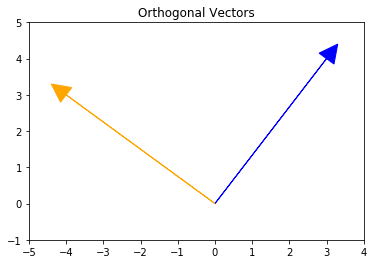

In [0]:
vector_1 = [3, 4]
vector_2 = [-4, 3]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.5, head_length=0.5, color ='blue')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.5, head_length=0.5, color ='orange')
plt.xlim(-5,4)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]
b = [6, -8, 2]
np.inner(a, b)

-40

### a and b are not orthogonal. This is shown by the value of the dot product not equalling zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c=[2, -15, 6, 20]
c_norm_squared = sum([x**2 for x in c])
c_dot_c = np.dot(c, c)
c_transpose_c = np.inner(c, c)
print(f'{c_norm_squared} == {c_dot_c} == {c_transpose_c}')


665 == 665 == 665


All three expressions are equivalent.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4, 12, 11, 9, 2]
f_norm = np.linalg.norm(f)
print(f'The length of f is {f_norm}')
f_unit = [x / f_norm for x in f]
print(f'The unit vector in the direction of f is {f_unit}')
print(f'The length of f_unit is {np.linalg.norm(f_unit).round()}')

The length of f is 19.131126469708992
The unit vector in the direction of f is [0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]
The length of f_unit is 1.0


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D

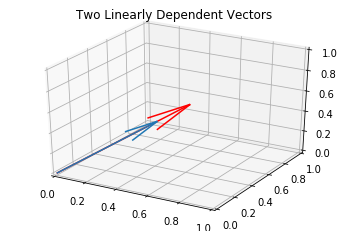

In [144]:
vector_a = np.array([0.4, 0.8, 0.4])
vector_b = np.array([0.3, 0.6, 0.3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector_a[0], vector_a[1], vector_a[2], color='red')
ax.quiver(0, 0, 0, vector_b[0], vector_b[1], vector_b[2])
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('Two Linearly Dependent Vectors')
plt.show()

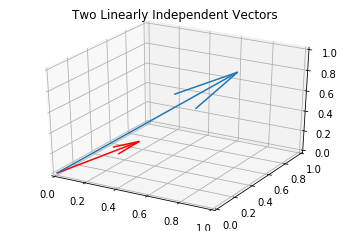

In [139]:
vector_c = np.array([0.3, 0.4, 0.2])
vector_d = np.array([0.7, 0.8, 0.8])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, vector_c[0], vector_c[1], vector_c[2], color='red')
ax.quiver(0, 0, 0, vector_d[0], vector_d[1], vector_d[2])
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('Two Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

### They are co-linear, so the span is $\mathbb{R}$, one dimensional space.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The matrix formed from l, m, and n is
\begin{align}
 A = \begin{bmatrix}
  1 & 2 & 3 \\
  -1 & 0 & 7 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

After reducing to row echelon form, this becomes
\begin{align}
 A = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  0 & 0 & 1 
 \end{bmatrix}
\end{align}

With 3 pivots, the span of $\{l, m, n\}$ is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



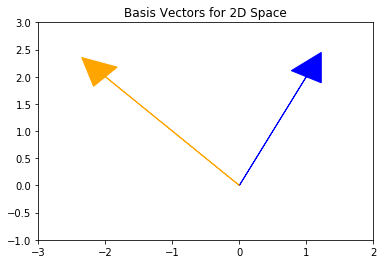

In [146]:
vector_3 = [1, 2]
vector_4 = [-2, 2]

plt.arrow(0,0, vector_3[0], vector_3[1],head_width=.5, head_length=0.5, color ='blue')
plt.arrow(0,0, vector_4[0], vector_4[1],head_width=.5, head_length=0.5, color ='orange')
plt.xlim(-3,2)          
plt.ylim(-1,3)
plt.title("Basis Vectors for 2D Space")
plt.show()

## 6.2 What does it mean to form a basis?

All possible vectors of the space are obtainable from linear combinations of the basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

The rank is the number of dimensions that the column space spans.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

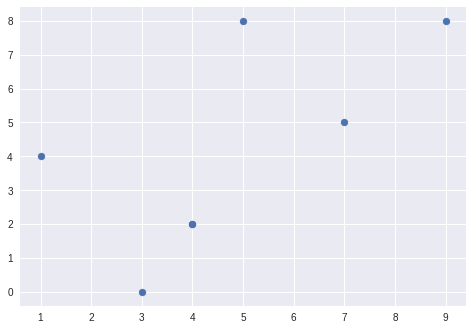

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()